## Observations and Insights 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(mouse_metadata)
print(study_results_path)
# Combine the data into a single dataset

data/Study_results.csv


In [16]:
merged_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [18]:
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice.
Unique_Mice = merged_df["Mouse ID"].nunique()
print(f"There is {Unique_Mice} mice in the study")

There is 249 mice in the study


In [21]:
#Create new column with ID as Mouse ID + Timepoint
merged_df["MouseTime_ID"] = str(mouse_metadata["Mouse ID"]) + str(study_results["Timepoint"])
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseTime_ID
0,k403,Ramicane,Male,21,16,0,45.000000,0,0 k403\n1 s185\n2 x401\n3 ...
1,k403,Ramicane,Male,21,16,5,38.825898,0,0 k403\n1 s185\n2 x401\n3 ...
2,k403,Ramicane,Male,21,16,10,35.014271,1,0 k403\n1 s185\n2 x401\n3 ...
3,k403,Ramicane,Male,21,16,15,34.223992,1,0 k403\n1 s185\n2 x401\n3 ...
4,k403,Ramicane,Male,21,16,20,32.997729,1,0 k403\n1 s185\n2 x401\n3 ...


In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df["Duplicated"] = merged_df["MouseTime_ID"].duplicated()



In [24]:
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseTime_ID,Duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,0 k403\n1 s185\n2 x401\n3 ...,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,0 k403\n1 s185\n2 x401\n3 ...,True
2,k403,Ramicane,Male,21,16,10,35.014271,1,0 k403\n1 s185\n2 x401\n3 ...,True
3,k403,Ramicane,Male,21,16,15,34.223992,1,0 k403\n1 s185\n2 x401\n3 ...,True
4,k403,Ramicane,Male,21,16,20,32.997729,1,0 k403\n1 s185\n2 x401\n3 ...,True


In [30]:
merged_duplicates_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseTime_ID,Duplicated
1,k403,Ramicane,Male,21,16,5,38.825898,0,0 k403\n1 s185\n2 x401\n3 ...,True
2,k403,Ramicane,Male,21,16,10,35.014271,1,0 k403\n1 s185\n2 x401\n3 ...,True
3,k403,Ramicane,Male,21,16,15,34.223992,1,0 k403\n1 s185\n2 x401\n3 ...,True
4,k403,Ramicane,Male,21,16,20,32.997729,1,0 k403\n1 s185\n2 x401\n3 ...,True
5,k403,Ramicane,Male,21,16,25,33.464577,1,0 k403\n1 s185\n2 x401\n3 ...,True


In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_duplicates_df = merged_df[merged_df["Duplicated"]==True]
merged_duplicates_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseTime_ID,Duplicated
1,k403,Ramicane,Male,21,16,5,38.825898,0,0 k403\n1 s185\n2 x401\n3 ...,True
2,k403,Ramicane,Male,21,16,10,35.014271,1,0 k403\n1 s185\n2 x401\n3 ...,True
3,k403,Ramicane,Male,21,16,15,34.223992,1,0 k403\n1 s185\n2 x401\n3 ...,True
4,k403,Ramicane,Male,21,16,20,32.997729,1,0 k403\n1 s185\n2 x401\n3 ...,True
5,k403,Ramicane,Male,21,16,25,33.464577,1,0 k403\n1 s185\n2 x401\n3 ...,True


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

merged_clean_df = merged_df.drop_duplicates(subset = ['Mouse ID','Timepoint'], keep='first')


In [39]:
merged_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseTime_ID,Duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,0 k403\n1 s185\n2 x401\n3 ...,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,0 k403\n1 s185\n2 x401\n3 ...,True
2,k403,Ramicane,Male,21,16,10,35.014271,1,0 k403\n1 s185\n2 x401\n3 ...,True
3,k403,Ramicane,Male,21,16,15,34.223992,1,0 k403\n1 s185\n2 x401\n3 ...,True
4,k403,Ramicane,Male,21,16,20,32.997729,1,0 k403\n1 s185\n2 x401\n3 ...,True


In [40]:
# Checking the number of mice in the clean DataFrame.
mousce_count = merged_clean_df["Mouse ID"].nunique()
mousce_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [41]:
#Groupby regimen
Drug_Regimen_grouped = 	merged_clean_df.groupby(["Drug Regimen"])

In [45]:
#Tumor Mean
Tumor_Volume_mean = Drug_Regimen_grouped["Tumor Volume (mm3)"].mean()


In [46]:
# Tumor median
Tumor_Volume_median = Drug_Regimen_grouped["Tumor Volume (mm3)"].median()


In [49]:
# Tumor variance
Tumor_Volume_variance = Drug_Regimen_grouped["Tumor Volume (mm3)"].var()


In [48]:
# Tumor standard deviation
Tumor_Volume_std = Drug_Regimen_grouped["Tumor Volume (mm3)"].std()


In [51]:
# Tumor SEM
Tumor_Volume_SEM = Drug_Regimen_grouped["Tumor Volume (mm3)"].sem()

In [54]:
tumor_sum_stat_df = pd.DataFrame({"Mean":Tumor_Volume_mean ,"Medium":Tumor_Volume_median , "Variance":Tumor_Volume_variance ,"STD":Tumor_Volume_std , "SEM":Tumor_Volume_SEM})
tumor_sum_stat_df

,Mean,Medium,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


In [58]:
Drug_Regimen_grouped.agg({"Tumor Volume (mm3)":["mean","median","var","std"]})

Tumor Volume (mm3)                                
                           mean     median        var       std
Drug Regimen                                                   
Capomulin             40.675741  41.557809  24.947764  4.994774
Ceftamin              52.591172  51.776157  39.290177  6.268188
Infubinol             52.884795  51.820584  43.128684  6.567243
Ketapril              55.235638  53.698743  68.553577  8.279709
Naftisol              54.331565  52.509285  66.173479  8.134708
Placebo               54.033581  52.288934  61.168083  7.821003
Propriva              52.393463  50.909965  43.138803  6.568014
Ramicane              40.216745  40.673236  23.486704  4.846308
Stelasyn              54.233149  52.431737  59.450562  7.710419
Zoniferol             53.236507  51.818479  48.533355  6.966589

In [60]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



In [86]:
# Work out number of mice in each drug regimen
regimen_mouse_count = Drug_Regimen_grouped["Mouse ID"].nunique()
regimen_mouse_count

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

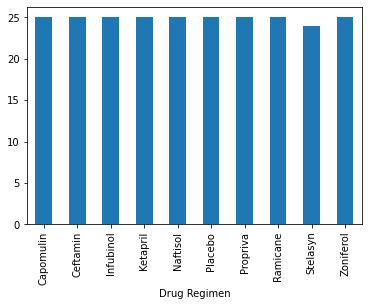

<Figure size 432x288 with 0 Axes>

In [70]:
mouse_chart = regimen_mouse_count.plot(kind="bar")
# regimen_mouse_count.set_xlabel("Drug Regimen")
# regimen_mouse_count.set_ylabel("Mouse count")
plt.show()
plt.tight_layout()

In [76]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
        # x_axis = regimen_mouse_count["Mouse ID"]
        # y_axis = regimen_mouse_count["Drug Regimen"]

        # plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")


In [ ]:
## Bar and Pie Charts

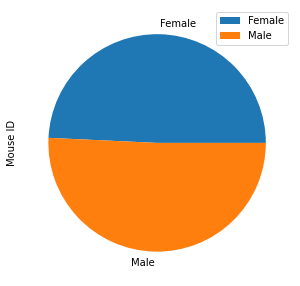

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_grouped = merged_clean_df.groupby(["Sex"]).count()
gender_grouped
sex_pie_chart = gender_grouped.plot.pie(y ="Mouse ID",figsize=(5,5))


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Last_df = Drug_Regimen_grouped["Timepoint"].max() 
Last_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Last_Tumor_df = pd.merge(merged_clean_df,Last_df, on="Timepoint",)
Last_Tumor_df

Last_Tumor_grouped = Last_Tumor_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].first()
Last_Tumor_grouped

Mouse ID
a203    67.973419
a251    65.525743
a262    70.717621
a275    62.999356
a401    66.794156
          ...    
y865    64.729837
z578    30.638696
z581    62.754451
z795    65.741070
z969    73.867845
Name: Tumor Volume (mm3), Length: 130, dtype: float64

In [101]:
# Put treatments into a list for for loop (and later for plot labels)
for Drug in Drugs:

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

SyntaxError: invalid syntax (<ipython-input-101-5f81edef9f5b>, line 2)

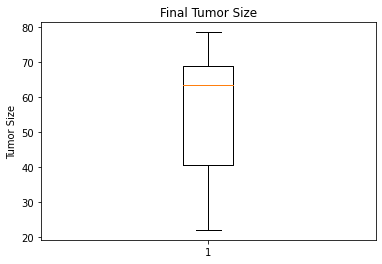

In [108]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Size")
ax1.set_ylabel('Tumor Size')
ax1.boxplot(Last_Tumor_grouped)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


